In [9]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
with open('vgg16.pkl', 'rb') as f:
    vgg16_metrics = pickle.load(f)

with open('vit_base.pkl', 'rb') as f:
    vit_base_metrics = pickle.load(f)


In [71]:
vit_base_metrics

{'c_top5_acc_mean': 0.8,
 'c_top5_acc_se': 0.06324555320336758,
 'c_top1_acc_mean': 0.5,
 'c_top1_acc_se': 0.07905694150420949,
 'i_top5_acc_mean': 0.65,
 'i_top5_acc_se': 0.07541551564499178,
 'i_top1_acc_mean': 0.45,
 'i_top1_acc_se': 0.07866066361276136}

In [5]:
# human references
davenport_c_acc_mean = 0.774
davenport_i_acc_mean = 0.560
munneke_c_acc_mean = 0.630
munneke_i_acc_mean = 0.497


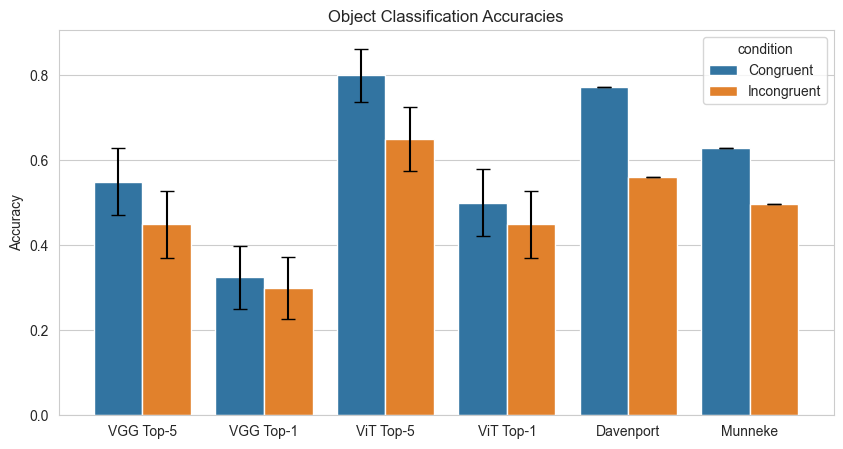

In [86]:
# plot with 6 groups (vgg, vit, davenport, munneke) of 2 bars (congruent and incogruent)

data = {
    'model': ['VGG Top-5', 'VGG Top-5', 'VGG Top-1', 'VGG Top-1', 'ViT Top-5', 'ViT Top-5', 'ViT Top-1', 'ViT Top-1', 'Davenport', 'Davenport', 'Munneke' , 'Munneke'],
    'condition': ['Congruent', 'Incongruent'] * 6,
    'accuracy': [vgg16_metrics['c_top5_acc_mean'], vgg16_metrics['i_top5_acc_mean'], vgg16_metrics['c_top1_acc_mean'], vgg16_metrics['i_top1_acc_mean'], vit_base_metrics['c_top5_acc_mean'], vit_base_metrics['i_top5_acc_mean'], vit_base_metrics['c_top1_acc_mean'], vit_base_metrics['i_top1_acc_mean'], davenport_c_acc_mean, davenport_i_acc_mean, munneke_c_acc_mean, munneke_i_acc_mean],
    'sem': [vgg16_metrics['c_top5_acc_se'], vgg16_metrics['i_top5_acc_se'], vgg16_metrics['c_top1_acc_se'], vgg16_metrics['i_top1_acc_se'], vit_base_metrics['c_top5_acc_se'], vit_base_metrics['i_top5_acc_se'], vit_base_metrics['c_top1_acc_se'], vit_base_metrics['i_top1_acc_se'], 0, 0, 0, 0],
    }

df = pd.DataFrame(data)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = sns.barplot(x='model', y='accuracy', hue='condition', data=df)
# error bars
def add_custom_errorbars(ax, df):
    bars = [bar for bar in ax.patches if type(bar) is plt.Rectangle]  # Filter only the bars
    bars = bars[:12]
    bars = bars[:12:6] + bars[1:12:6] + bars[2:12:6] + bars[3:12:6] + bars[4:12:6] + bars[5:12:6]
    # bars = bars[0::2] + bars[1::2]
    for i, bar in enumerate(bars):
        # Get the center of the bar
        x = bar.get_x() + bar.get_width() / 2
        # Get the height of the bar
        y = bar.get_height()
        # Get the SEM (error bar)
        sem = df.iloc[i]['sem']
        # Plot the error bar
        ax.errorbar(x, y, yerr=sem, fmt='none', c='black', capsize=5)
add_custom_errorbars(ax, df)

plt.xlabel('')
plt.ylabel('Accuracy')
plt.title('Object Classification Accuracies')


# Display the plot
plt.show()

In [69]:
ax.patches[13]

In [49]:
np.mean((0.078, 0.078))


0.078